#**Bank Customer Churn**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [39]:
data=pd.read_csv("/content/drive/MyDrive/Project_Y3/Churn_Modelling.csv")

In [40]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [41]:
data["Surname"].value_counts()

Smith       32
Walker      29
Martin      29
Scott       29
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [42]:
data["Exited"].value_counts()

0    7964
1    2038
Name: Exited, dtype: int64

In [43]:
data.drop(columns=["CustomerId","Surname"],inplace=True)

In [44]:
data[data["Exited"]==1].describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.0
mean,4908.416585,645.413641,44.836605,4.931796,91100.672198,1.475466,0.699215,0.360648,101461.468916,1.0
std,2868.370987,100.336103,9.759368,2.935698,58347.548784,0.801408,0.458712,0.480306,57898.512937,0.0
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,2421.250000,578.000000,38.000000,2.000000,38591.222500,1.000000,0.000000,0.000000,51924.020000,1.0
50%,4875.500000,646.000000,45.000000,5.000000,109344.230000,1.000000,1.000000,0.000000,102431.875000,1.0
75%,7419.750000,716.000000,51.000000,8.000000,131423.637500,2.000000,1.000000,1.000000,152359.130000,1.0
max,9999.000000,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


# Analysis

## Visualization


In [46]:
import seaborn as sns

In [47]:
data["Exited"].value_counts()

0    7964
1    2038
Name: Exited, dtype: int64

In [49]:
data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [50]:
# plt.figure(figsize=(15,7))
# sns.boxplot(y=data["CrPerTen"],x=data["Exited"],hue=data["Exited"])
# plt.show()

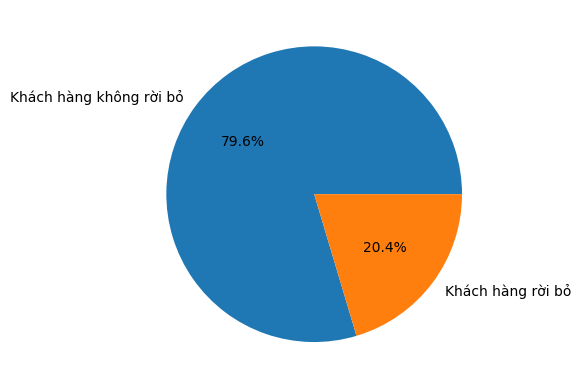

In [51]:
plt.pie(data["Exited"].value_counts(), labels=["Khách hàng không rời bỏ","Khách hàng rời bỏ"],autopct="%.01f%%")
plt.show()

Credit Score: A numerical value representing the customer's credit score

Geography: The country where the customer resides (France, Spain or Germany)

Gender: The customer's gender (Male or Female)

Age: The customer's age.

Tenure: The number of years the customer has been with the bank

Balance: The customer's account balance

NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)

IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)

EstimatedSalary: The estimated salary of the customer

Exited: Whether the customer has churned (1 = yes, 0 = no)

In [53]:
data[data["IsActiveMember"]==0]

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,3,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,8,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,11,528,France,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9998,9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [54]:
data_Not_Active=data[(data["Exited"]==1)& (data["IsActiveMember"]==0)]

<Axes: xlabel='IsActiveMember', ylabel='Balance'>

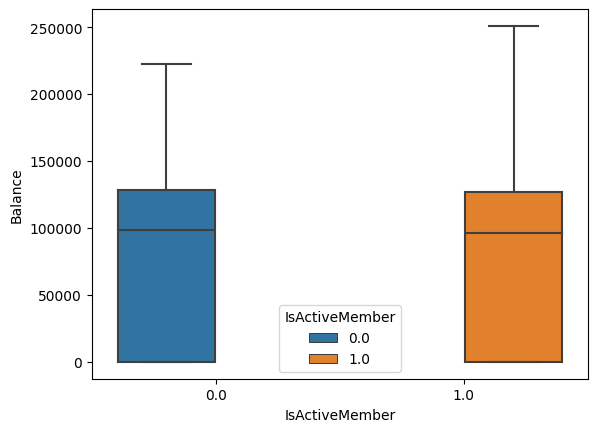

In [55]:
sns.boxplot(y=data["Balance"],x=data["IsActiveMember"],hue=data["IsActiveMember"])

<Axes: xlabel='NumOfProducts', ylabel='count'>

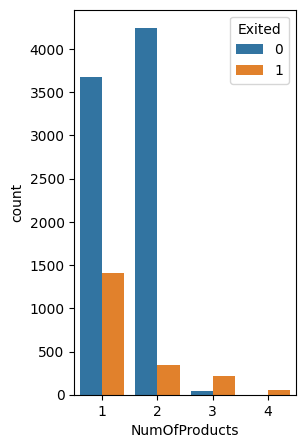

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(1, 6, 1)
sns.countplot(data=data, x="NumOfProducts", hue="Exited")


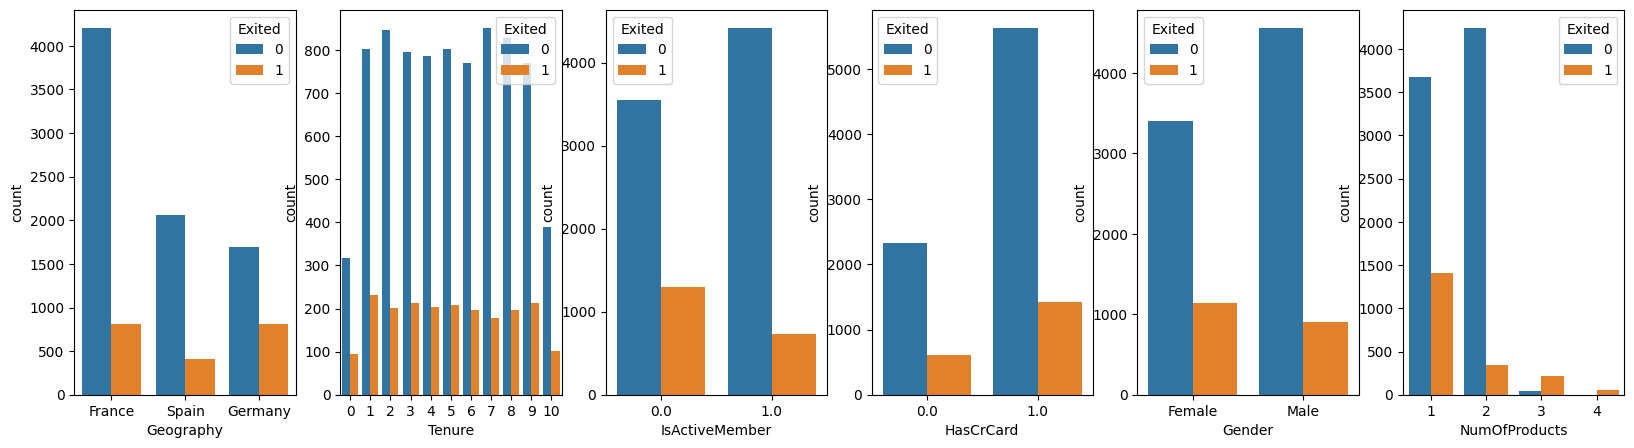

In [57]:
plt.figure(figsize=(20,5))

plt.subplot(1, 6, 1)
sns.countplot(data=data, x="Geography", hue="Exited")

plt.subplot(1, 6, 2)
sns.countplot(data=data, x="Tenure", hue="Exited")

plt.subplot(1, 6, 3)
sns.countplot(data=data, x="IsActiveMember", hue="Exited")

plt.subplot(1, 6, 4)
sns.countplot(data=data, x="HasCrCard", hue="Exited")

plt.subplot(1, 6, 5)
sns.countplot(data=data, x="Gender", hue="Exited")

plt.subplot(1, 6, 6)
sns.countplot(data=data, x="NumOfProducts", hue="Exited")
plt.show()

Hầu hết khách hàng đều đến từ Pháp với Tây Ban Nha ở vị trí thứ 2 và Đức ở vị trí thứ 3

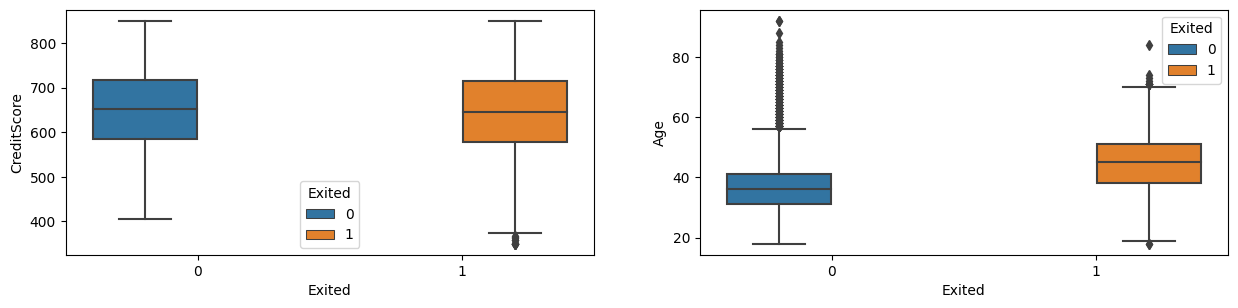

In [58]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(y=data["CreditScore"],x=data["Exited"],hue=data["Exited"])
plt.subplot(2,2,2)
sns.boxplot(y=data["Age"],x=data["Exited"],hue=data["Exited"])
plt.show()

Độ phân bổ CreditScore của khách hàng không rời bỏ bank chủ yếu từ 580-720 (50%)

Độ phân bổ CreditScore của khách hàng rời bỏ bank chủ yếu từ 580-720 (50%)
=> Không có sự khác biệt đáng kể sự phấn bố giữa Exited 0 và 1

Có một lượng CreditScore <400 có tần suất thấp

Độ tuổi rời bỏ ngân hàng chủ yếu từ 40-55 tuổi và lượng người 70 tuổi trở lên có tần xuất thấp

Độ tuổi ở lại Ngân hàng chủ yếu từ 30-40 tuổi và cs một lượng người từ 58 tuổi trở lên với tần xuất thấp

=> Có thể dịch vụ của ngân hàng phù hợp với sở thích với những người cao tuổi hơn trẻ


Có thể loại bỏ những điểm dữ liệu phân bố thấp ra

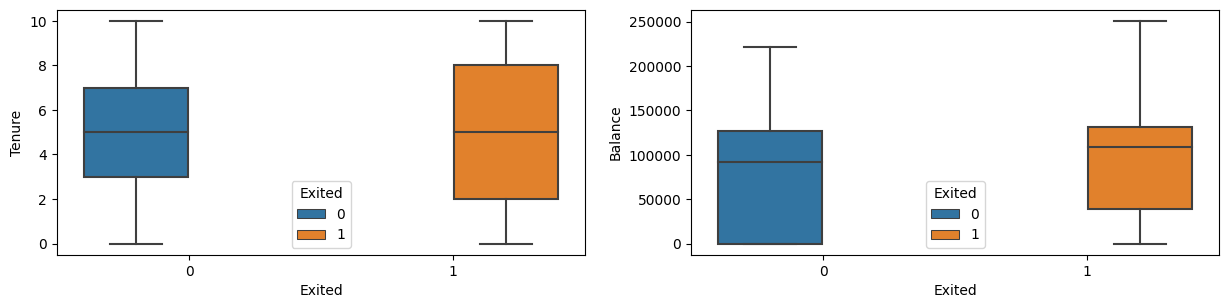

In [59]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(y=data["Tenure"],x=data["Exited"],hue=data["Exited"])
plt.subplot(2,2,2)
sns.boxplot(y=data["Balance"],x=data["Exited"],hue=data["Exited"])
plt.show()

Khách hàng gắn bó với bank thấp sẽ có tỉ lệ rời bỏ cao hơn

Số lượng khách hàng có số dư tài khoản ngân hàng lớn cũng đang rời bỏ => Mất dần lượng khách có số dư lớn


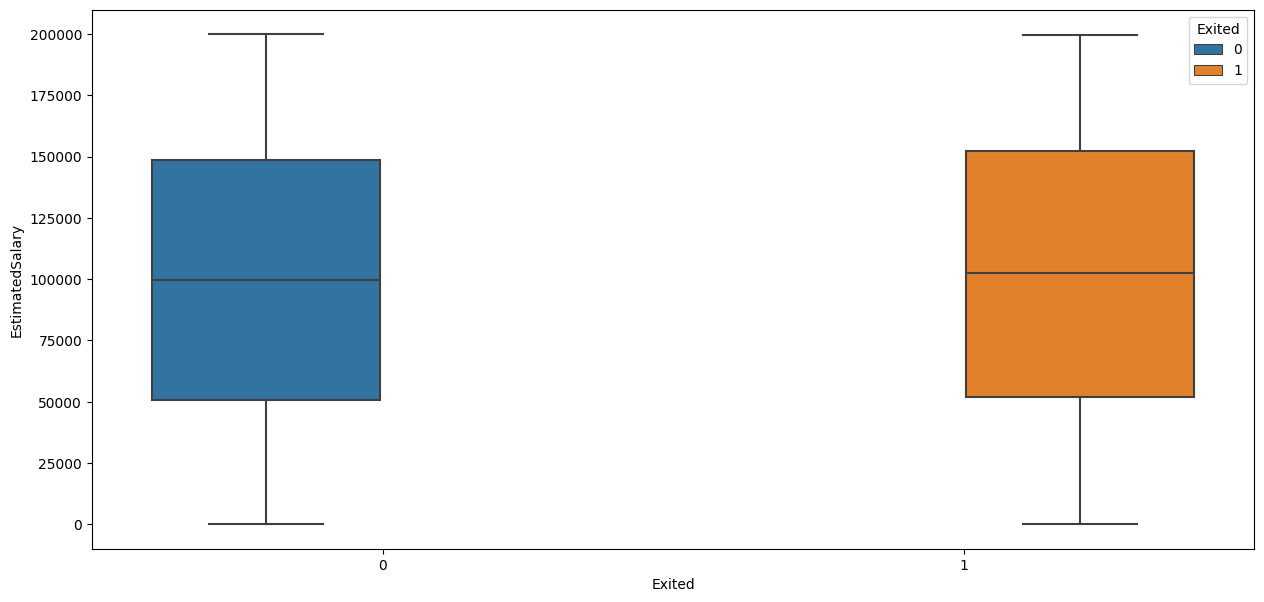

In [60]:
plt.figure(figsize=(15,7))

sns.boxplot(y=data["EstimatedSalary"],x=data["Exited"],hue=data["Exited"])
plt.show()

số tiền lương không ảnh hướng mấy đến với việc Khách hàng có rời bỏ ngân hàng hay không

## EDA



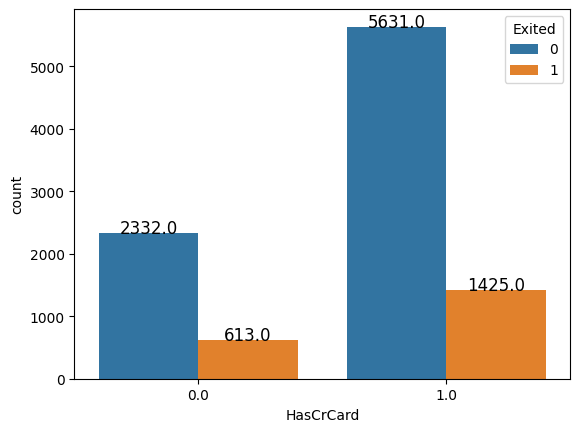

In [61]:
ax = sns.countplot(data=data, x="HasCrCard", hue="Exited")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', color='black', size=12)

plt.show()

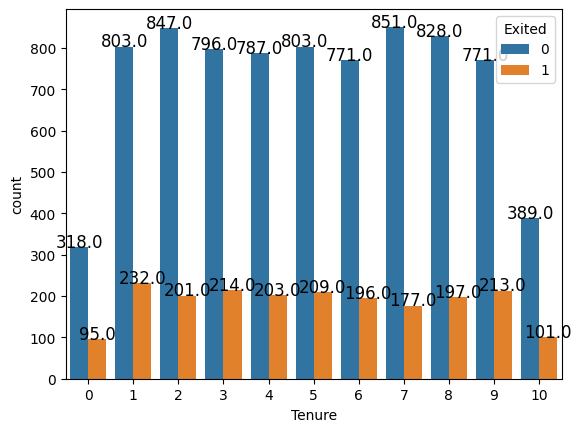

In [62]:
ax = sns.countplot(data=data, x="Tenure", hue="Exited")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', color='black', size=12)

plt.show()

In [63]:
from sklearn.impute import KNNImputer
import plotly.express as px

In [64]:
for i in data.columns:
  if pd.api.types.is_numeric_dtype(data[i]):
    print(f"The column '{i}' is numeric.")
  else:
    print(f"The column '{i}' is not numeric.")

The column 'RowNumber' is numeric.
The column 'CreditScore' is numeric.
The column 'Geography' is not numeric.
The column 'Gender' is not numeric.
The column 'Age' is numeric.
The column 'Tenure' is numeric.
The column 'Balance' is numeric.
The column 'NumOfProducts' is numeric.
The column 'HasCrCard' is numeric.
The column 'IsActiveMember' is numeric.
The column 'EstimatedSalary' is numeric.
The column 'Exited' is numeric.


In [65]:
data

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


<ipython-input-66-b174bf077c64>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(data.corr(), cmap="YlGnBu",ax=ax, annot=True)


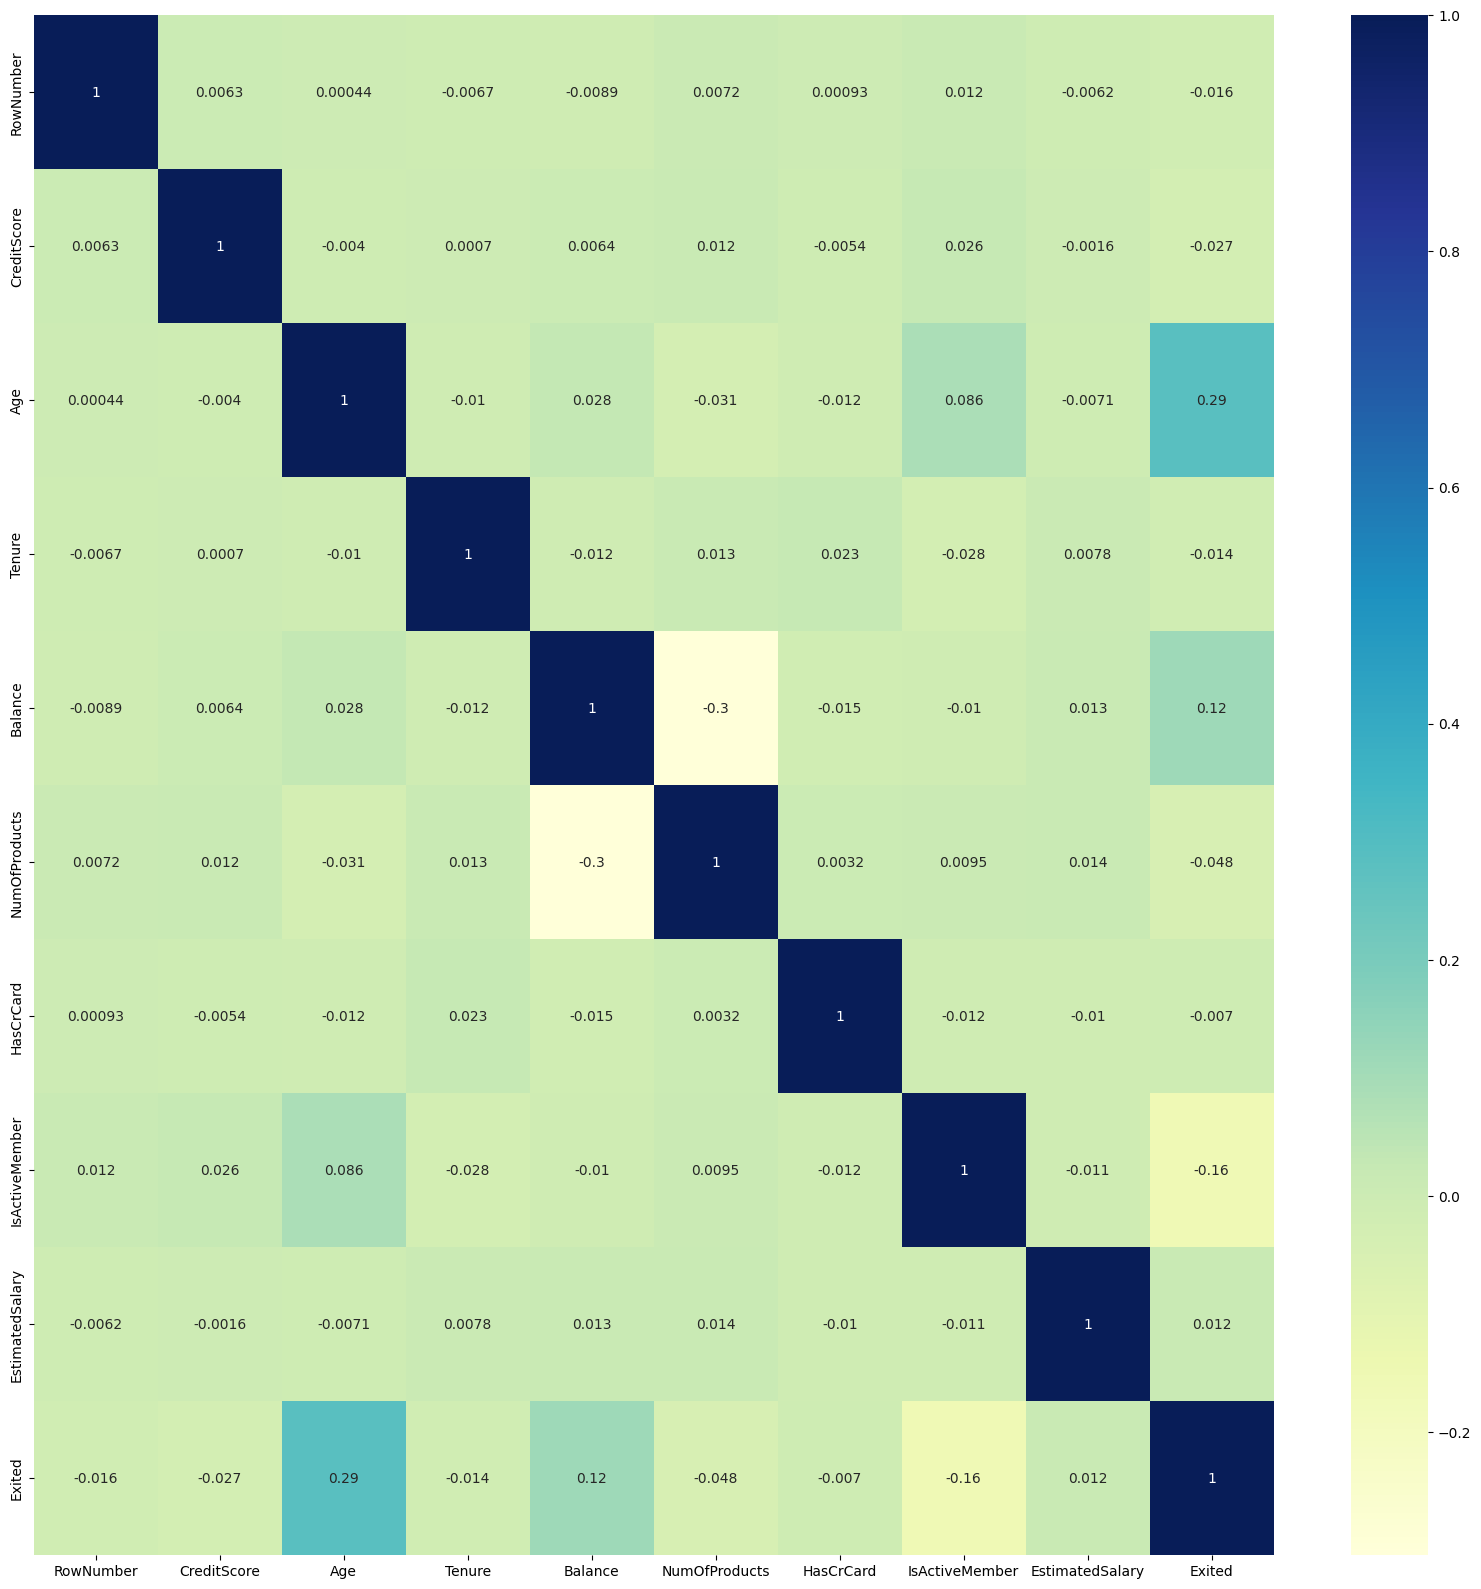

In [66]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(20,20))
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu",ax=ax, annot=True)
plt.show()

Excited

        tương quan thuận với: GeoGraphy, Age, Balance, EstimatedSalary
        
        tương quan nghịch với: CreditScore, Gender, Tenure, NumOfProducts, HashCard, IsActiveMember,

In [67]:
data.describe().T\
    .style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])\
    .background_gradient(subset=['std'], cmap='Blues')\
    .background_gradient(subset=['50%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
RowNumber,10002.000000,5001.499600,2887.472338,1.000000,2501.250000,5001.500000,7501.750000,10000.000000
CreditScore,10002.000000,650.555089,96.661615,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10001.000000,38.922311,10.487200,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10002.000000,5.012498,2.891973,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10002.000000,76491.112875,62393.474144,0.000000,0.000000,97198.540000,127647.840000,250898.090000
NumOfProducts,10002.000000,1.530194,0.581639,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10001.000000,0.705529,0.455827,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10001.000000,0.514949,0.499801,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10002.000000,100083.331145,57508.117802,11.580000,50983.750000,100185.240000,149383.652500,199992.480000
Exited,10002.000000,0.203759,0.402812,0.000000,0.000000,0.000000,0.000000,1.000000


Balance,EstimatedSalary có mức giá trị khá chênh lệch so với các cột khác

In [68]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum())/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    return sum

summary(data).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count
RowNumber,int64,0,0.000000,10000,10002
CreditScore,int64,0,0.000000,460,10002
Geography,object,1,0.000100,3,10001
Gender,object,0,0.000000,2,10002
Age,float64,1,0.000100,73,10001
Tenure,int64,0,0.000000,11,10002
Balance,float64,0,0.000000,6382,10002
NumOfProducts,int64,0,0.000000,4,10002
HasCrCard,float64,1,0.000100,2,10001
IsActiveMember,float64,1,0.000100,2,10001


In [69]:
data.dropna(inplace=True)

# Training


In [71]:
data.drop(columns=["RowNumber"],axis=1,inplace=True)
data.dropna(inplace=True)
#data.drop(columns=["HasCrCard","EstimatedSalary","Tenure","CreditScore"],inplace=True)
data_train,data_test=train_test_split(data,train_size=0.8,random_state=0)
save_test=data_test.copy()
save_test.reset_index(drop=True, inplace=True)


## Preprocess

In [73]:
data["Exited"].value_counts()

0    7960
1    2038
Name: Exited, dtype: int64

In [74]:
def Remove_Outlier(data):
  data_Not_Exited=data[data["Exited"]==0]
  for i in data_Not_Exited.columns:
    if(i=="Exited"):
      continue
    if(data_Not_Exited[i].dtype!="O"):
      Q1 = data_Not_Exited[i].quantile(0.25)
      Q3 = data_Not_Exited[i].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      data_Not_Exited=data_Not_Exited[(data_Not_Exited[i] >= lower_bound ) & (data_Not_Exited[i] <= upper_bound)]
  data_Exited=data[data["Exited"]==1]
  for i in data_Exited.columns:
    if(i=="Exited"):
      continue
    if(data_Exited[i].dtype!="O"):
      Q1 = data_Exited[i].quantile(0.25)
      Q3 = data_Exited[i].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      data_Exited=data_Exited[(data_Exited[i] >= lower_bound ) & (data_Exited[i] <= upper_bound)]
  return data_Not_Exited,data_Exited

In [75]:
data_Not_Exited,data_Exited=Remove_Outlier(data_train)


In [76]:
#data=pd.concat([data_Not_Exited,data_Exited])
data=data_train

In [79]:
data=pd.get_dummies(data,drop_first=True)
data_test=pd.get_dummies(data_test,drop_first=True)

### Process Imbalance Data

In [84]:
data["Exited"].value_counts()

0    6378
1    1620
Name: Exited, dtype: int64

In [85]:
x_train=data.drop(columns=["Exited"],axis=1)
y_train=data["Exited"]
x_test=data_test.drop(columns=["Exited"],axis=1)
y_test=data_test["Exited"]

In [86]:
cnn_test=x_test.copy()
cnn_test["Tenure"]=cnn_test["Tenure"]+1
cnn_test["CrperTen"]=round(cnn_test["CreditScore"]/cnn_test["Tenure"],1)
cnn_test["BaperTen"]=round(cnn_test["Balance"]/cnn_test["Tenure"],1)

## Imbalance Data, Scaler

CHIA RA TẬP TRAIN TEST RỒI CHỈ TĂNG MẪU TRÊN TẬP TEST THÔI


In [87]:
from imblearn.over_sampling import SMOTE


In [88]:
sm=SMOTE(random_state=42,sampling_strategy=1)
x_train,y_train=sm.fit_resample(x_train,y_train)

In [89]:
y_train.value_counts()

0    6378
1    6378
Name: Exited, dtype: int64

In [90]:
# from imblearn.under_sampling import TomekLinks
# tomek_links = TomekLinks(sampling_strategy='auto')
# x_train,y_train= tomek_links.fit_resample(x_train, y_train)



In [91]:
y_train.value_counts()

0    6378
1    6378
Name: Exited, dtype: int64

In [92]:
cnn_train=x_train.copy()
cnn_train["Tenure"]=cnn_train["Tenure"]+1
cnn_train["CrperTen"]=round(cnn_train["CreditScore"]/cnn_train["Tenure"],1)
cnn_train["BaperTen"]=round(cnn_train["Balance"]/cnn_train["Tenure"],1)

In [93]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def Scaler(x_train,data_test):
  col=["CreditScore","Balance","EstimatedSalary","Age","Tenure","NumOfProducts"]
#  col=["Age","Balance","NumOfProducts"]
  scaler = MinMaxScaler()
  scale=scaler.fit(x_train[col])
  x_train[col]=scale.transform(x_train[col])
  data_test[col]=scale.transform(data_test[col])
  return x_train,data_test
x_train,x_test=Scaler(x_train,x_test)

In [94]:
cnn_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'CrperTen', 'BaperTen'],
      dtype='object')

In [95]:
def Scaler_CNN(cnn_train,cnn_test):
  col=["CreditScore","Balance","EstimatedSalary","Tenure","Age","NumOfProducts","CrperTen","BaperTen"]
#  col=["Age","Balance","NumOfProducts"]
  scaler = MinMaxScaler()
  scale=scaler.fit(cnn_train[col])
  cnn_train[col]=scale.transform(cnn_train[col])
  cnn_test[col]=scale.transform(cnn_test[col])
  return cnn_train,cnn_test
cnn_train,cnn_test=Scaler_CNN(cnn_train,cnn_test)


In [96]:
cnn_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,CrperTen,BaperTen
0,0.414,0.216216,0.3,0.000000,0.000000,0.000000,1.000000,0.617141,0,1,1,0.125922,0.000000
1,0.802,0.391892,0.5,0.568637,0.333333,1.000000,0.000000,0.813825,0,0,1,0.108706,0.120676
2,0.258,0.202703,0.2,0.829682,0.000000,0.000000,0.000000,0.253840,0,0,0,0.151131,0.352151
3,0.712,0.135135,0.3,0.000000,0.333333,0.000000,1.000000,0.907747,0,1,1,0.171790,0.000000
4,0.610,0.310811,0.8,0.500450,0.000000,0.000000,0.000000,0.820225,1,0,1,0.044270,0.070804
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12751,0.776,0.421326,0.7,0.466680,0.000000,0.589067,0.000000,0.929152,0,0,0,0.068126,0.074280
12752,0.308,0.257819,0.4,0.496222,0.000000,0.000000,0.000000,0.335797,0,0,0,0.078701,0.126370
12753,0.656,0.411930,0.2,0.288105,0.333333,0.699313,0.699313,0.292823,0,0,0,0.232661,0.122284
12754,0.464,0.394293,0.4,0.000000,0.333333,0.000000,0.000000,0.309572,0,0,0,0.097885,0.000000


## Training

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [98]:
def reported(y_true,y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")

# MODEL

## CNN

In [99]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [100]:
cnn_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,CrperTen,BaperTen
0,0.414,0.216216,0.3,0.000000,0.000000,0.000000,1.000000,0.617141,0,1,1,0.125922,0.000000
1,0.802,0.391892,0.5,0.568637,0.333333,1.000000,0.000000,0.813825,0,0,1,0.108706,0.120676
2,0.258,0.202703,0.2,0.829682,0.000000,0.000000,0.000000,0.253840,0,0,0,0.151131,0.352151
3,0.712,0.135135,0.3,0.000000,0.333333,0.000000,1.000000,0.907747,0,1,1,0.171790,0.000000
4,0.610,0.310811,0.8,0.500450,0.000000,0.000000,0.000000,0.820225,1,0,1,0.044270,0.070804
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12751,0.776,0.421326,0.7,0.466680,0.000000,0.589067,0.000000,0.929152,0,0,0,0.068126,0.074280
12752,0.308,0.257819,0.4,0.496222,0.000000,0.000000,0.000000,0.335797,0,0,0,0.078701,0.126370
12753,0.656,0.411930,0.2,0.288105,0.333333,0.699313,0.699313,0.292823,0,0,0,0.232661,0.122284
12754,0.464,0.394293,0.4,0.000000,0.333333,0.000000,0.000000,0.309572,0,0,0,0.097885,0.000000


In [101]:
classifier=Sequential()
classifier.add(Dense(10,activation='relu',input_dim=10))
classifier.add(Dense(10,activation='relu'))
classifier.add(Dense(10,activation='relu'))
classifier.add(Dense(10,activation='relu'))
classifier.add(Dense(10,activation='relu'))
classifier.add(Dense(10,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))

In [102]:
cnn_train=cnn_train.drop(columns=["Balance","Tenure","CreditScore"])
cnn_test=cnn_test.drop(columns=["Balance","Tenure","CreditScore"])
# cnn_train=cnn_train.drop(columns=["HasCrCard","EstimatedSalary","Balance","Tenure","CreditScore"])
# cnn_test=cnn_test.drop(columns=["HasCrCard","EstimatedSalary","Balance","Tenure","CreditScore"])

In [103]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [104]:
history = classifier.fit(cnn_train,y_train,batch_size=16,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
638/638 [==============================] - 3s 3ms/step - loss: 0.5929 - accuracy: 0.6874 - val_loss: 0.6150 - val_accuracy: 0.7241
Epoch 2/100
638/638 [==============================] - 2s 2ms/step - loss: 0.5143 - accuracy: 0.7585 - val_loss: 0.5920 - val_accuracy: 0.7116
Epoch 3/100
638/638 [==============================] - 2s 3ms/step - loss: 0.4989 - accuracy: 0.7687 - val_loss: 0.5971 - val_accuracy: 0.7010
Epoch 4/100
638/638 [==============================] - 2s 2ms/step - loss: 0.4884 - accuracy: 0.7758 - val_loss: 0.4392 - val_accuracy: 0.7998
Epoch 5/100
638/638 [==============================] - 2s 3ms/step - loss: 0.4823 - accuracy: 0.7784 - val_loss: 0.5888 - val_accuracy: 0.6963
Epoch 6/100
638/638 [==============================] - 3s 5ms/step - loss: 0.4754 - accuracy: 0.7826 - val_loss: 0.6529 - val_accuracy: 0.6548
Epoch 7/100
638/638 [==============================] - 4s 6ms/step - loss: 0.4700 - accuracy: 0.7850 - val_loss: 0.4053 - val_accuracy: 0.8178

In [105]:
report = classification_report(y_test, (classifier.predict(cnn_test) > 0.5).astype(int))
print(report)

63/63 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1582
           1       0.71      0.49      0.58       418

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



63/63 [==============================] - 0s 1ms/step


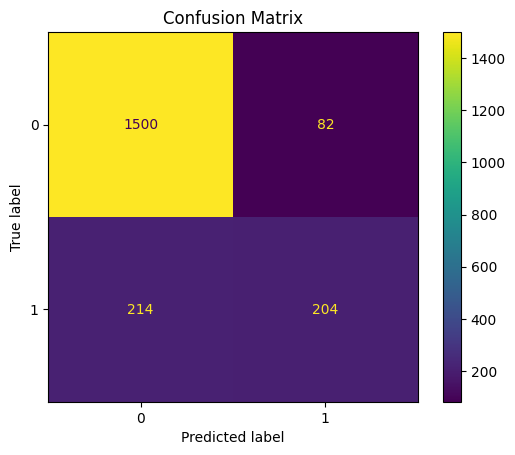

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, (classifier.predict(cnn_test) > 0.5).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm )
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

THử kết hợp các cột như tenure vs CreditScore Tenure Balance

## SVC

In [107]:
from sklearn.svm import SVC
svc=SVC(C=2,gamma="auto")
svc.fit(x_train,y_train)

SVC(C=2, gamma='auto')

In [108]:
svc.score(x_test,y_test)

0.7965

In [109]:
reported(y_test,svc.predict(x_test))

Accuracy: 0.7965
Precision: 0.8010614105670016
Recall: 0.7965
F1 Score: 0.7986440439282653


In [110]:
report = classification_report(y_test, svc.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1582
           1       0.51      0.54      0.53       418

    accuracy                           0.80      2000
   macro avg       0.69      0.70      0.70      2000
weighted avg       0.80      0.80      0.80      2000



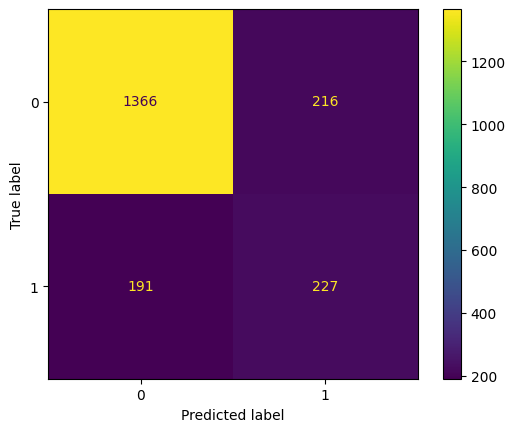

In [111]:
ConfusionMatrixDisplay.from_estimator(svc,x_test,y_test)

## Gradient Boosting


In [112]:
import xgboost as xgb
GBC = xgb.XGBClassifier(n_estimators=200)
GBC.fit(x_train,y_train)
GBC.score(x_test,y_test)
report = classification_report(y_test, GBC.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1582
           1       0.66      0.55      0.60       418

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [113]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3)

In [114]:
GBC.fit(x_train,y_train)
GBC.score(x_test,y_test)

0.8495

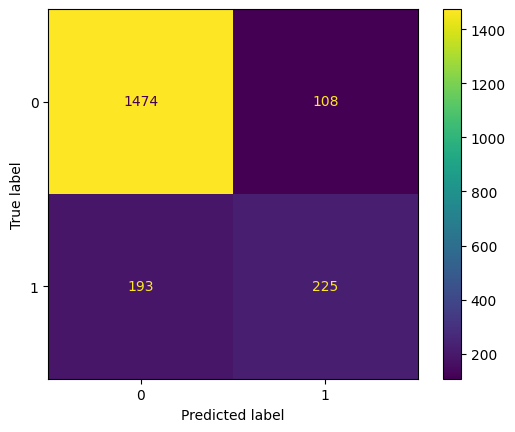

In [115]:
ConfusionMatrixDisplay.from_estimator(GBC,x_test,y_test)

In [116]:
reported(y_test,GBC.predict(x_test))

Accuracy: 0.8495
Precision: 0.8406367321130369
Recall: 0.8495
F1 Score: 0.8429517053080761


In [117]:
report = classification_report(y_test, GBC.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1582
           1       0.68      0.54      0.60       418

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000



## Decision Tree


In [118]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.778

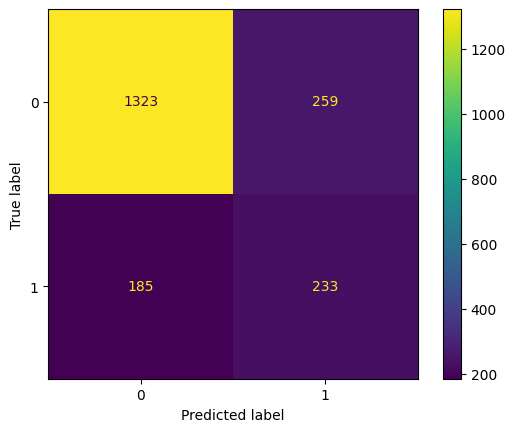

In [119]:
ConfusionMatrixDisplay.from_estimator(dt,x_test,y_test)

In [120]:
reported(y_test,dt.predict(x_test))

Accuracy: 0.778
Precision: 0.7929385176079877
Recall: 0.778
F1 Score: 0.7843681211991891


In [121]:
report = classification_report(y_test,dt.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1582
           1       0.47      0.56      0.51       418

    accuracy                           0.78      2000
   macro avg       0.68      0.70      0.68      2000
weighted avg       0.79      0.78      0.78      2000



## Voting Classifier

In [137]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [138]:
clf1 = DecisionTreeClassifier()
clf2 = SVC(C=2,gamma="auto",probability=True)
clf3 = RandomForestClassifier(n_estimators=100, random_state=1)

vt=VotingClassifier(estimators=[ ('dt', clf1), ('svc', clf2), ('rf', clf3)],voting="hard")
vt.fit(x_train,y_train)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('svc', SVC(C=2, gamma='auto', probability=True)),
                             ('rf', RandomForestClassifier(random_state=1))])

In [139]:
vt.score(x_test,y_test)

0.843

In [140]:
reported(y_test,vt.predict(x_test))

Accuracy: 0.843
Precision: 0.83770597945708
Recall: 0.843
F1 Score: 0.8398759913323726


In [141]:
report = classification_report(y_test, vt.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1582
           1       0.64      0.57      0.60       418

    accuracy                           0.84      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000



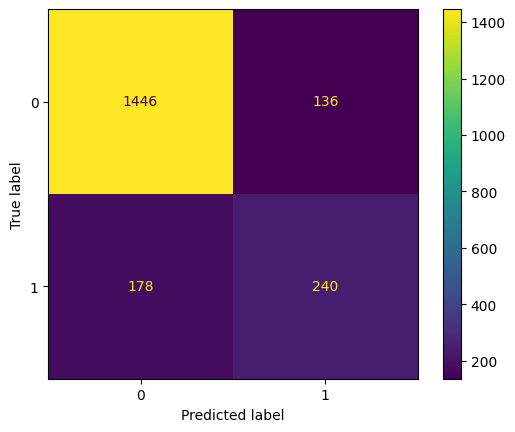

In [142]:
ConfusionMatrixDisplay.from_estimator(vt,x_test,y_test)

# PHÂN TÍCH LỖI TRÊN MÔ HÌNH RANDOM FOREST (MÔ HÌNH CHO ĐỘ CHÍNH XÁC TỔNG QUAN CAO HƠN CÁC MÔ HÌNH CÒN LẠI)

## Random Forest

In [122]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.841

In [123]:
reported(y_test,rf.predict(x_test))

Accuracy: 0.841
Precision: 0.8338521680216802
Recall: 0.841
F1 Score: 0.8365043634779527


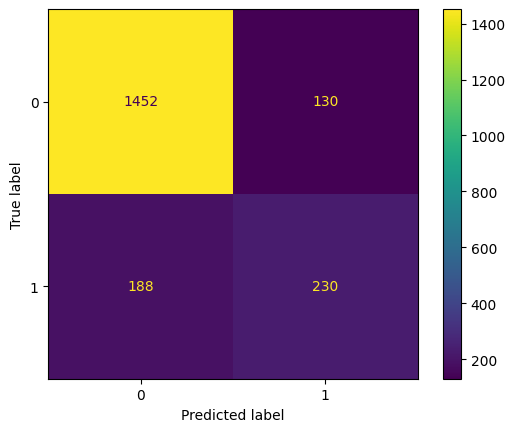

In [124]:
ConfusionMatrixDisplay.from_estimator(rf,x_test,y_test)

In [125]:
report = classification_report(y_test, rf.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1582
           1       0.64      0.55      0.59       418

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.75      2000
weighted avg       0.83      0.84      0.84      2000



In [126]:
save_test.reset_index(drop=True, inplace=True)
save_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,738,Germany,Male,37.0,7,140950.92,2,1.0,0.0,195333.98,0
1,645,France,Female,48.0,7,90612.34,1,1.0,1.0,149139.13,0
2,508,France,Female,64.0,2,0.00,1,1.0,1.0,6076.62,0
3,620,France,Male,41.0,3,0.00,2,1.0,1.0,137309.06,0
4,545,Germany,Male,33.0,1,132527.90,2,0.0,1.0,107429.71,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,557,France,Male,34.0,3,83074.00,1,1.0,0.0,132673.22,0
1996,588,Germany,Male,41.0,2,131341.46,2,0.0,1.0,7034.94,0
1997,685,Spain,Male,23.0,5,164902.43,1,0.0,0.0,141152.28,0
1998,630,Germany,Female,25.0,7,79656.81,1,1.0,0.0,93524.22,0


In [127]:
pred=pd.DataFrame(rf.predict(x_test), columns=['Predicted'])
prediction=pd.concat([save_test,pred],axis=1)

In [128]:
Predicted_Wrong=prediction[prediction["Exited"]!=prediction["Predicted"]]

In [129]:
Predicted_Wrong[(prediction["Exited"] == 1) & (prediction["Predicted"] == 0) &( prediction["Geography"]=="Germany") ]

<ipython-input-129-e69f1dff6cce>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Predicted_Wrong[(prediction["Exited"] == 1) & (prediction["Predicted"] == 0) &( prediction["Geography"]=="Germany") ]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted
15,581,Germany,Male,39.0,1,121523.51,1,0.0,0.0,161655.55,1,0
60,706,Germany,Male,67.0,1,123276.69,2,1.0,1.0,86507.88,1,0
127,661,Germany,Male,37.0,7,109908.06,2,1.0,0.0,115037.67,1,0
155,436,Germany,Male,45.0,3,104339.11,2,1.0,1.0,183540.22,1,0
159,420,Germany,Female,34.0,1,135549.90,1,0.0,0.0,149471.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1873,665,Germany,Female,51.0,9,110610.41,2,0.0,1.0,1112.76,1,0
1879,681,Germany,Male,42.0,3,118199.97,2,1.0,0.0,9452.88,1,0
1952,628,Germany,Male,38.0,10,113525.84,1,1.0,0.0,46044.48,1,0
1961,698,Germany,Male,56.0,1,112414.81,2,0.0,0.0,93982.02,1,0


Vì độ tuổi có tương quan mạnh với các nhãn dự đoán nên => có thể là tác nhân chính gây ra việc dự đoán sai  

Các trường tương quan mạnh với nhãn dự đoán là Balance, Age, Geography mà giá trị của các trường này đều chủ yếu nằm trong nhãn 1 mà thực tế là nhãn 0 => có sự sai sót

Mô hình học máy có xu hướng học được các đặc điểm của lớp đa số và bỏ qua các đặc điểm của lớp thiểu số
mà các đặc điểm quan trọng như  Balance, Age, Geography tương quan mạnh với nhãn dự đoán, bên cạnh đó các điểm dữ liệu này chủ yếu thuộc nhãn 1 nên nó sẽ dự đoán vào nhãn 1

In [130]:
Predicted_Wrong[(prediction["Exited"] == 1) & (prediction["Predicted"] == 0) &( prediction["Geography"]=="Germany") &(prediction["Age"]<=41) ]

<ipython-input-130-c0e57254d5b9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Predicted_Wrong[(prediction["Exited"] == 1) & (prediction["Predicted"] == 0) &( prediction["Geography"]=="Germany") &(prediction["Age"]<=41) ]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted
15,581,Germany,Male,39.0,1,121523.51,1,0.0,0.0,161655.55,1,0
127,661,Germany,Male,37.0,7,109908.06,2,1.0,0.0,115037.67,1,0
159,420,Germany,Female,34.0,1,135549.90,1,0.0,0.0,149471.13,1,0
295,638,Germany,Female,33.0,5,129335.65,1,1.0,1.0,56585.20,1,0
321,731,Germany,Female,21.0,8,132312.06,1,1.0,0.0,106663.46,1,0
423,829,Germany,Female,27.0,9,112045.67,1,1.0,1.0,119708.21,1,0
580,543,Germany,Male,41.0,6,143350.41,1,1.0,1.0,192070.16,1,0
587,556,Germany,Male,37.0,9,145018.64,2,1.0,0.0,90928.02,1,0
633,476,Germany,Female,34.0,8,111905.43,1,0.0,1.0,197221.81,1,0
696,598,Germany,Male,38.0,1,101487.18,1,1.0,1.0,75959.10,1,0


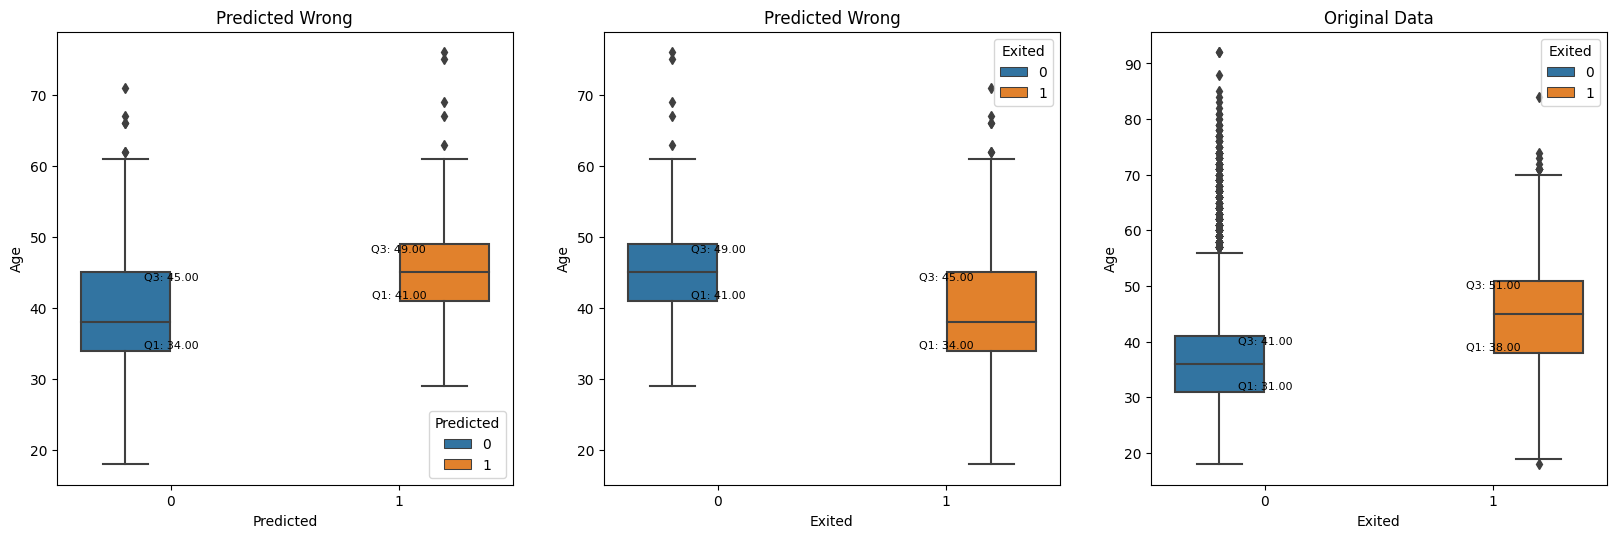

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20,20))

plt.subplot(3, 3, 1)
ax1 = sns.boxplot(y=Predicted_Wrong["Age"], x=Predicted_Wrong["Predicted"], hue=Predicted_Wrong["Predicted"])

for tick in ax1.get_xticks():
    ax1.text(tick, Predicted_Wrong.groupby("Predicted")["Age"].quantile(0.25).loc[tick],
             f'Q1: {Predicted_Wrong.groupby("Predicted")["Age"].quantile(0.25).loc[tick]:.2f}',
             ha='center', va='bottom', color='black', fontsize=8)
    ax1.text(tick, Predicted_Wrong.groupby("Predicted")["Age"].quantile(0.75).loc[tick],
             f'Q3: {Predicted_Wrong.groupby("Predicted")["Age"].quantile(0.75).loc[tick]:.2f}',
             ha='center', va='top', color='black', fontsize=8)
plt.title("Predicted Wrong")

plt.subplot(3, 3, 2)
ax2 = sns.boxplot(y=Predicted_Wrong["Age"], x=Predicted_Wrong["Exited"], hue=Predicted_Wrong["Exited"])

for tick in ax2.get_xticks():
    ax2.text(tick, Predicted_Wrong.groupby("Exited")["Age"].quantile(0.25).loc[tick],
             f'Q1: {Predicted_Wrong.groupby("Exited")["Age"].quantile(0.25).loc[tick]:.2f}',
             ha='center', va='bottom', color='black', fontsize=8)
    ax2.text(tick, Predicted_Wrong.groupby("Exited")["Age"].quantile(0.75).loc[tick],
             f'Q3: {Predicted_Wrong.groupby("Exited")["Age"].quantile(0.75).loc[tick]:.2f}',
             ha='center', va='top', color='black', fontsize=8)
plt.title("Predicted Wrong")
plt.subplot(3,3,3)
ax = sns.boxplot(y=data["Age"], x=data["Exited"], hue=data["Exited"])

for tick in ax.get_xticks():
    ax.text(tick, data.groupby("Exited")["Age"].quantile(0.25).loc[tick],
            f'Q1: {data.groupby("Exited")["Age"].quantile(0.25).loc[tick]:.2f}',
            ha='center', va='bottom', color='black', fontsize=8)
    ax.text(tick, data.groupby("Exited")["Age"].quantile(0.75).loc[tick],
            f'Q3: {data.groupby("Exited")["Age"].quantile(0.75).loc[tick]:.2f}',
            ha='center', va='top', color='black', fontsize=8)
    plt.title("Original Data")
plt.show()


Nhãn 1 thực tế bị dự đoán là 0 đa số nằm trong độ tuổi từ 34-44

Nhãn 0 thực tế bị dự đoán là 1 đa số nằm trong dộ tuổi từ 39-48




In [132]:
tmp=pd.get_dummies(Predicted_Wrong,drop_first=True)
col=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male','Exited', 'Predicted']
cor=pd.DataFrame(tmp[col])



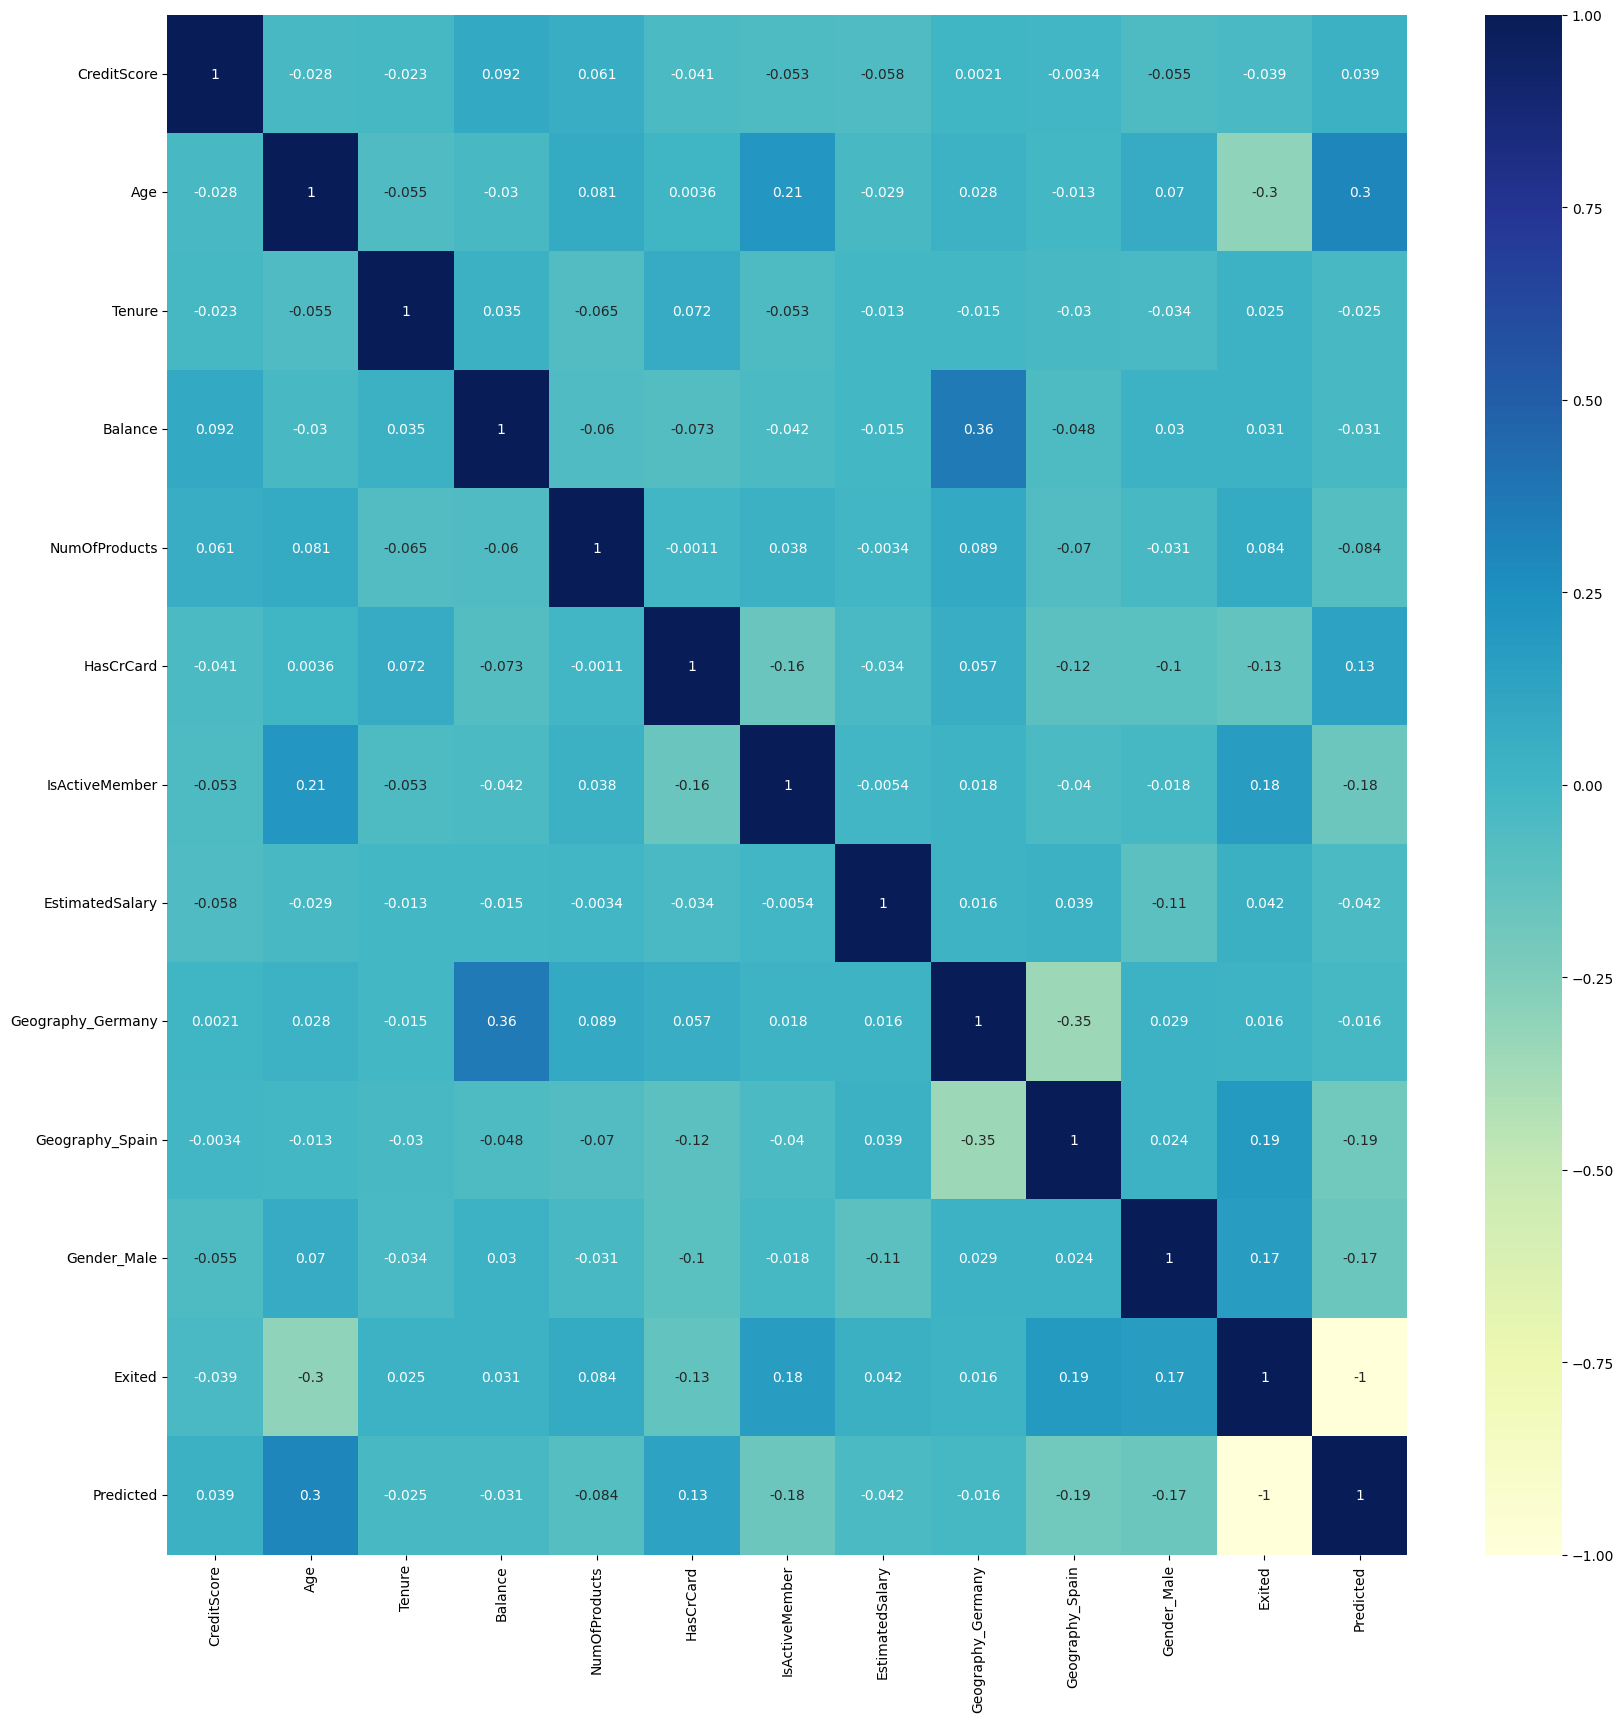

In [133]:
# cor=pd.get_dummies(Predicted_Wrong,drop_first=True)
import seaborn as sb
fig, ax = plt.subplots(figsize=(20,20))
dataplot = sb.heatmap(cor.corr(), cmap="YlGnBu",ax=ax, annot=True)
plt.show()

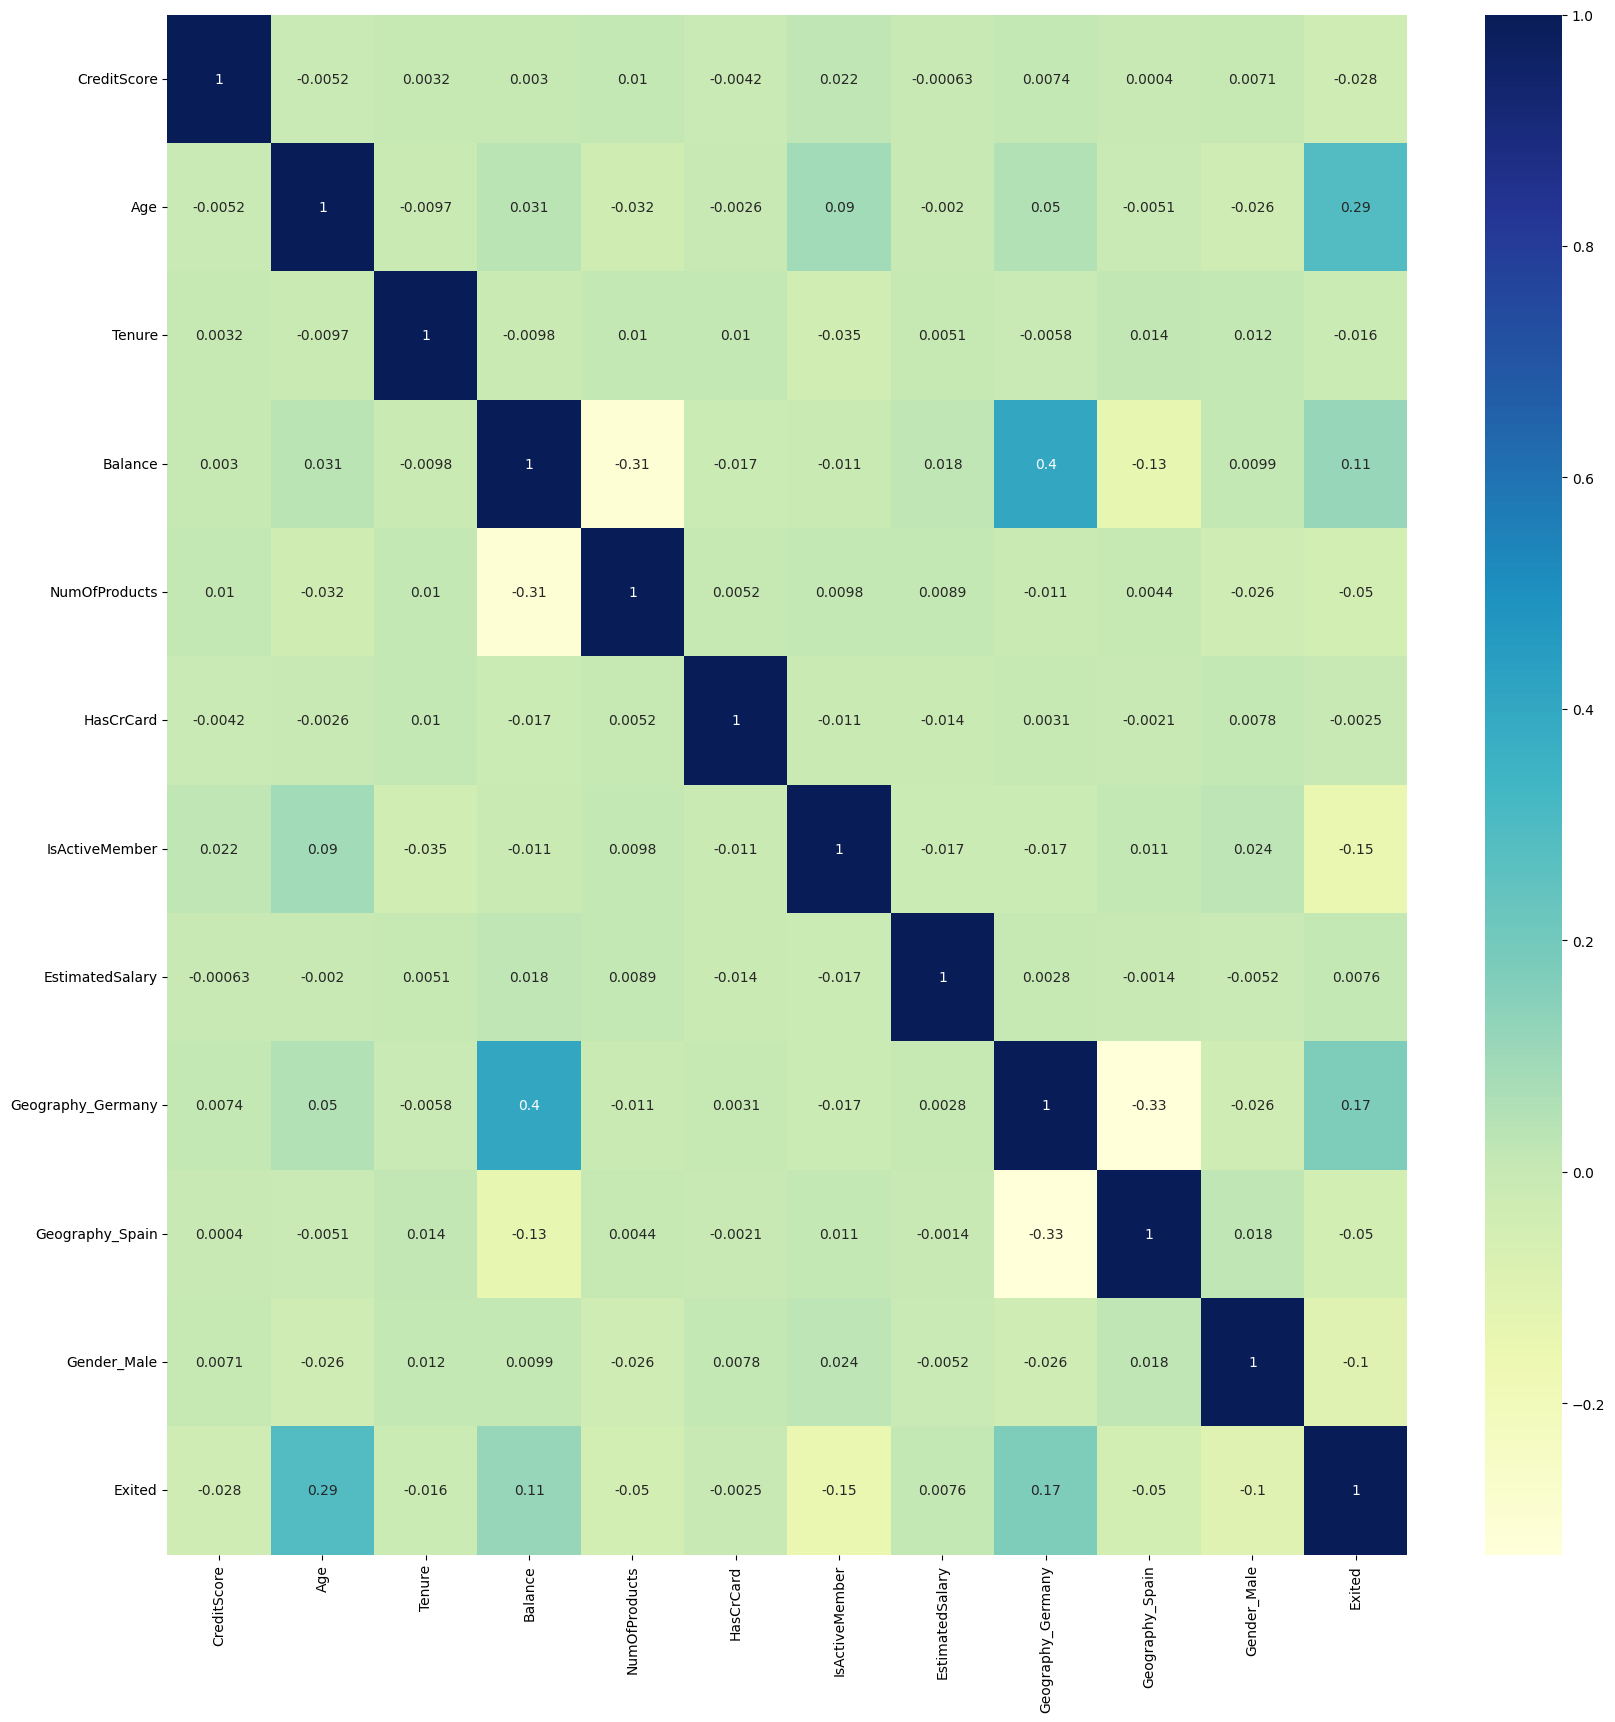

In [134]:
cor=pd.get_dummies(data_train,drop_first=True)
col=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male','Exited']
cor=pd.DataFrame(cor[col])
import seaborn as sb
fig, ax = plt.subplots(figsize=(20,20))
dataplot = sb.heatmap(cor.corr(), cmap="YlGnBu",ax=ax, annot=True)
plt.show()

In [135]:
cor.corr()["Exited"]

CreditScore         -0.027956
Age                  0.288004
Tenure              -0.015705
Balance              0.112876
NumOfProducts       -0.049658
HasCrCard           -0.002536
IsActiveMember      -0.147692
EstimatedSalary      0.007558
Geography_Germany    0.169959
Geography_Spain     -0.049802
Gender_Male         -0.100789
Exited               1.000000
Name: Exited, dtype: float64

In [136]:
prediction.to_csv("error_analysis.csv")